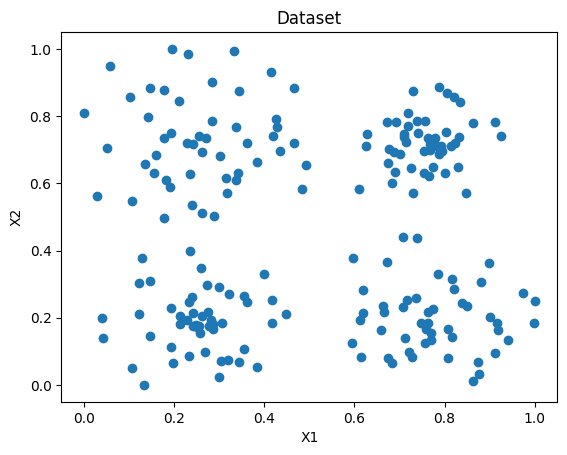

In [106]:
import numpy as np
import matplotlib.pyplot as plt

""" Making a dataset """
def random_around(center=(0, 0), max_r=0, size=1):
    theta = np.linspace(0, 2 * np.pi, size)
    radius = np.random.uniform(low=0, high=max_r, size=(size))

    x = radius * np.cos(theta) + center[0]
    y = radius * np.sin(theta) + center[1]

    return x, y

# Create the dataset
np.random.seed(69)  # Set a seed for reproducibility

# Generate four clusters with different centers, radii, and sizes
cluster1 = random_around(center=(1,1), max_r=0.8, size=50)
cluster2 = random_around(center=(1,-1), max_r=1, size=50)
cluster3 = random_around(center=(-1,1), max_r=1.2, size=50)
cluster4 = random_around(center=(-1,-1), max_r=0.9, size=50)

# Concatenate the clusters into a single dataset
dataset = np.hstack([cluster1, cluster2, cluster3, cluster4]).T

def normalize(x):
    in_min = np.min(x, axis=0)
    in_max = np.max(x, axis=0)
    out_min = 0
    out_max = 1

    return (x - in_min) * (out_max - out_min) / (in_max - in_min) + out_min

dataset = normalize(dataset)

# Visualize the dataset
plt.scatter(dataset[:, 0], dataset[:, 1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Dataset')
plt.show()

In [107]:
# step 0
def init(n_clusters=1, n_features=1, n_points=1):
    cluster_centroids = np.random.uniform(low=0, high=1, size=(n_clusters, n_features))
    clusters = [[] for _ in range(n_clusters)]  # since the size is gonna change (as is inhomogeneous), I'm letting it be a list

    return cluster_centroids, clusters

# step 1
def find_nearest(cluster_centroids, clusters, points):
    # loop through each point in training set 
    for pt_index, pt in enumerate(points):
        dists = []  # stores distances of current point to all cluster centroids

        for center_index, center in enumerate(cluster_centroids):
            dist_vec = center - pt
            dist = np.linalg.norm(dist_vec)
            dists.append(dist)
        
        nearest_center = dists.index(min(dists))
        clusters[nearest_center].append(pt)

    return clusters

def adjust_centroids(cluster_centroids, clusters):
    n_features = len(clusters[0][0])  # Get the number of features

    # loop through all N clusters
    for cluster_index, cluster in enumerate(clusters):
        # Extract coordinates for each feature
        coordinates = [[] for _ in range(n_features)]

        # loop through each point in the cluster
        for point in cluster:
            for i, coord in enumerate(point):
                coordinates[i].append(coord)

        coordinates = np.array(coordinates).reshape(-1,n_features)
        x_mean = np.mean(coordinates, axis=0)

        print(f"cluster number: {cluster_index}\n", cluster_centroids[cluster_index], "\n", x_mean)

        cluster_centroids[cluster_index] = x_mean

    return cluster_centroids, clusters

        

In [108]:
def get_visuals(cluster_centroids, clusters):
    for cluster_index, cluster in enumerate(clusters):
        x_values = [point[0] for point in cluster]
        y_values = [point[1] for point in cluster]
        plt.scatter(x_values, y_values)
        
    # Plot cluster centroids
    plt.scatter(cluster_centroids[:, 0], cluster_centroids[:, 1], marker='x', color='red')
    
    plt.show()


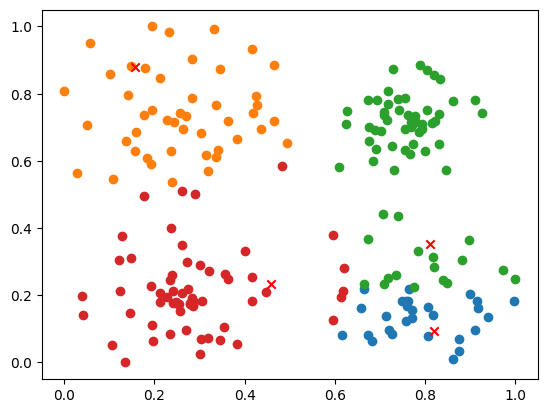

cluster number: 0
 [0.82088644 0.09463344] 
 [0.4656602  0.46001817]
cluster number: 1
 [0.15732974 0.88016735] 
 [0.50486474 0.49803205]
cluster number: 2
 [0.81196507 0.35303115] 
 [0.69519236 0.68613609]
cluster number: 3
 [0.45813652 0.23278659] 
 [0.25610358 0.24848028]
cluster number: 0
 [0.4656602  0.46001817] 
 [0.44249713 0.4449768 ]
cluster number: 1
 [0.50486474 0.49803205] 
 [0.52140662 0.51419733]
cluster number: 2
 [0.69519236 0.68613609] 
 [0.70420098 0.70593527]
cluster number: 3
 [0.25610358 0.24848028] 
 [0.24457704 0.23654333]
cluster number: 0
 [0.44249713 0.4449768 ] 
 [0.43639511 0.43967469]
cluster number: 1
 [0.52140662 0.51419733] 
 [0.52410843 0.5199669 ]
cluster number: 2
 [0.70420098 0.70593527] 
 [0.71141571 0.71149553]
cluster number: 3
 [0.24457704 0.23654333] 
 [0.23748065 0.23387459]
cluster number: 0
 [0.43639511 0.43967469] 
 [0.43285032 0.43575661]
cluster number: 1
 [0.52410843 0.5199669 ] 
 [0.52809959 0.52447898]
cluster number: 2
 [0.71141571 0.7

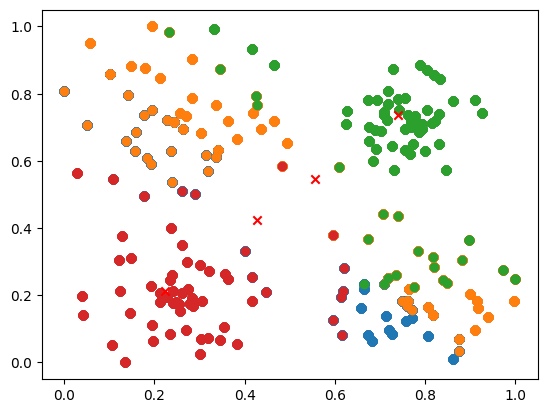

In [109]:
if __name__ == "__main__":
    cluster_centroids, clusters = init(n_clusters=4, n_features=2, n_points=dataset.shape[0])
    clusters = find_nearest(cluster_centroids, clusters, dataset)
    
    get_visuals(cluster_centroids, clusters)

    # loop
    for _ in range(100):
        cluster_centroids, clusters = adjust_centroids(cluster_centroids, clusters)
        clusters = find_nearest(cluster_centroids, clusters, dataset)
    
    get_visuals(cluster_centroids, clusters)
